## House Price Prediction - Multivariable Regression

### Import Boston Data from sklearn

In [1]:
from sklearn.datasets import load_boston 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
boston_data = load_boston()

In [3]:
type(boston_data)

sklearn.utils.Bunch

In [5]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_data.data.shape

(506, 13)

### Convert the data to a Pandas DataFrame

In [8]:
df = pd.DataFrame(data = boston_data.data, columns = boston_data.feature_names)

In [9]:
df['PRICE'] = boston_data.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Different ways to check missing values in each Feature (Variable)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [12]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Exploratory Data Analysis through Data Visualization

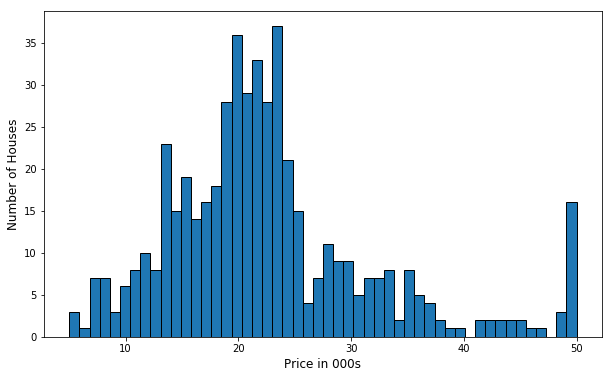

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['PRICE'], bins=50, ec='black')
plt.xlabel('Price in 000s', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.show()

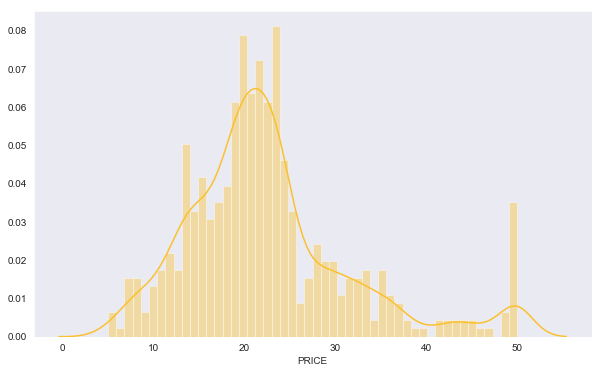

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['PRICE'], bins=50, hist=True, kde=True, color='#fbc02d') # kde argument for Probability Density Function
sns.set_style(style='dark', rc=None)
plt.show()

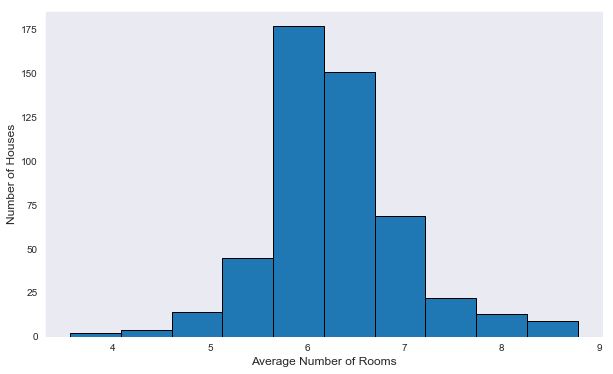

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df['RM'], ec='black')
plt.xlabel('Average Number of Rooms', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.show()

In [18]:
df1 = df['RAD'].value_counts()
df1

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

Plotting these values on a Histogram is a better idea since this feature is based on a dummy variable.

In [19]:
print(type(df1))
df1.values

<class 'pandas.core.series.Series'>


array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

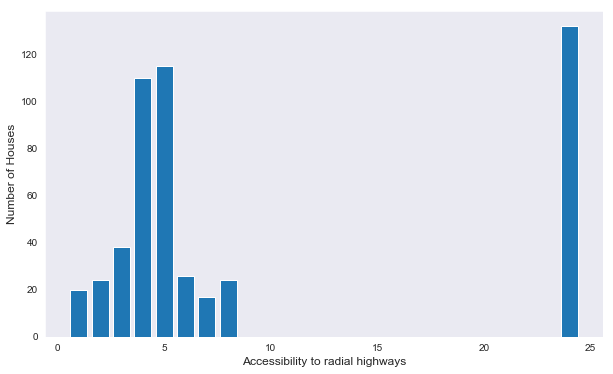

In [20]:
plt.figure(figsize = (10,6))
plt.bar(df1.index, height = df1)
plt.xlabel('Accessibility to radial highways', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.show()

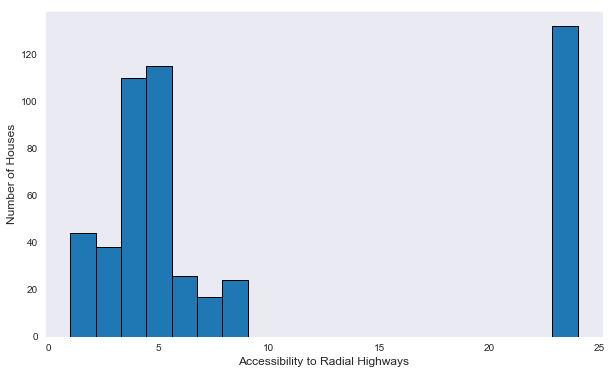

In [21]:
# checking the distribution in a histogram
plt.figure(figsize=(10,6))
plt.hist(df['RAD'], bins = 20, ec='black')
plt.xlabel('Accessibility to Radial Highways', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.show()

In [22]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statistics

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Please note that the 50% values are the median. We can also use the below method to get the median.

In [25]:
df.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

### Correlation Analysis
### $\ {-1} \leq \rho(x,y) \leq \ {+1}$

In [26]:
df['PRICE'].corr(df['RM'])

0.695359947071539

In [27]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
mask1 = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask1)
mask1[triangle_indices] = True
mask1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

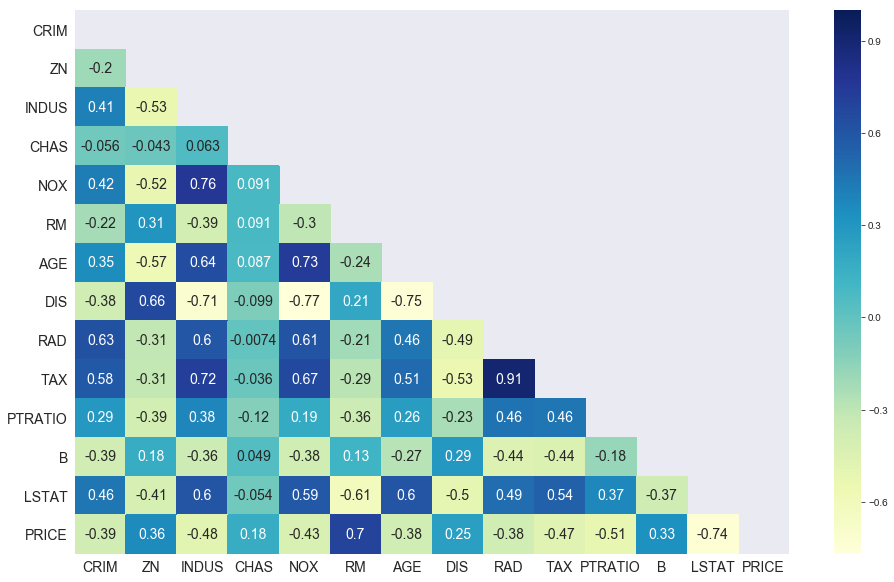

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask1, annot=True, annot_kws={'size':14}, cmap="YlGnBu")
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

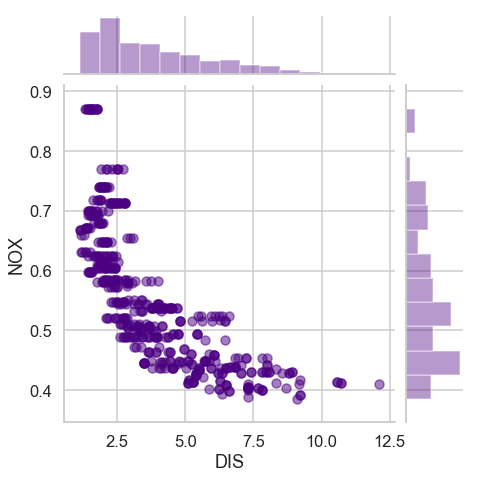

In [37]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=df['DIS'], y=df['NOX'], color='indigo', height=7, joint_kws={'alpha':0.5})
plt.show()

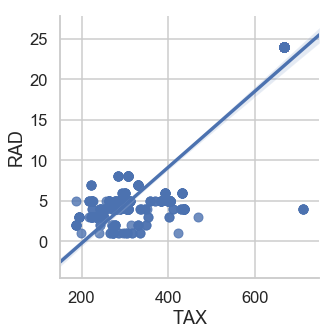

In [38]:
sns.lmplot(x='TAX', y='RAD', data=df)
plt.show()

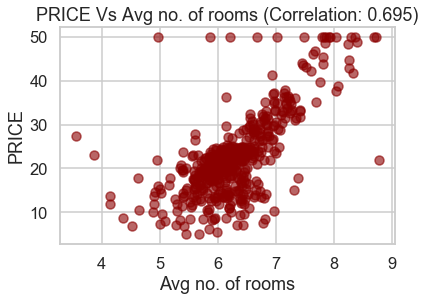

In [39]:
corr_rooms = round(df['PRICE'].corr(df['RM']), 3)
plt.scatter(x=df['RM'], y=df['PRICE'], alpha=0.6, color='darkred')
plt.title(f'PRICE Vs Avg no. of rooms (Correlation: {corr_rooms})')
plt.xlabel('Avg no. of rooms')
plt.ylabel('PRICE')
plt.show()

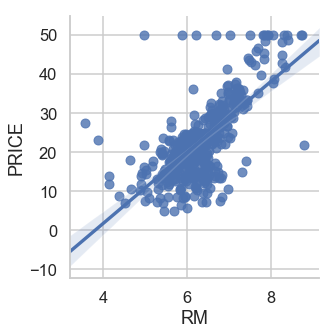

In [40]:
sns.lmplot(x='RM', y='PRICE', data=df)
plt.show()

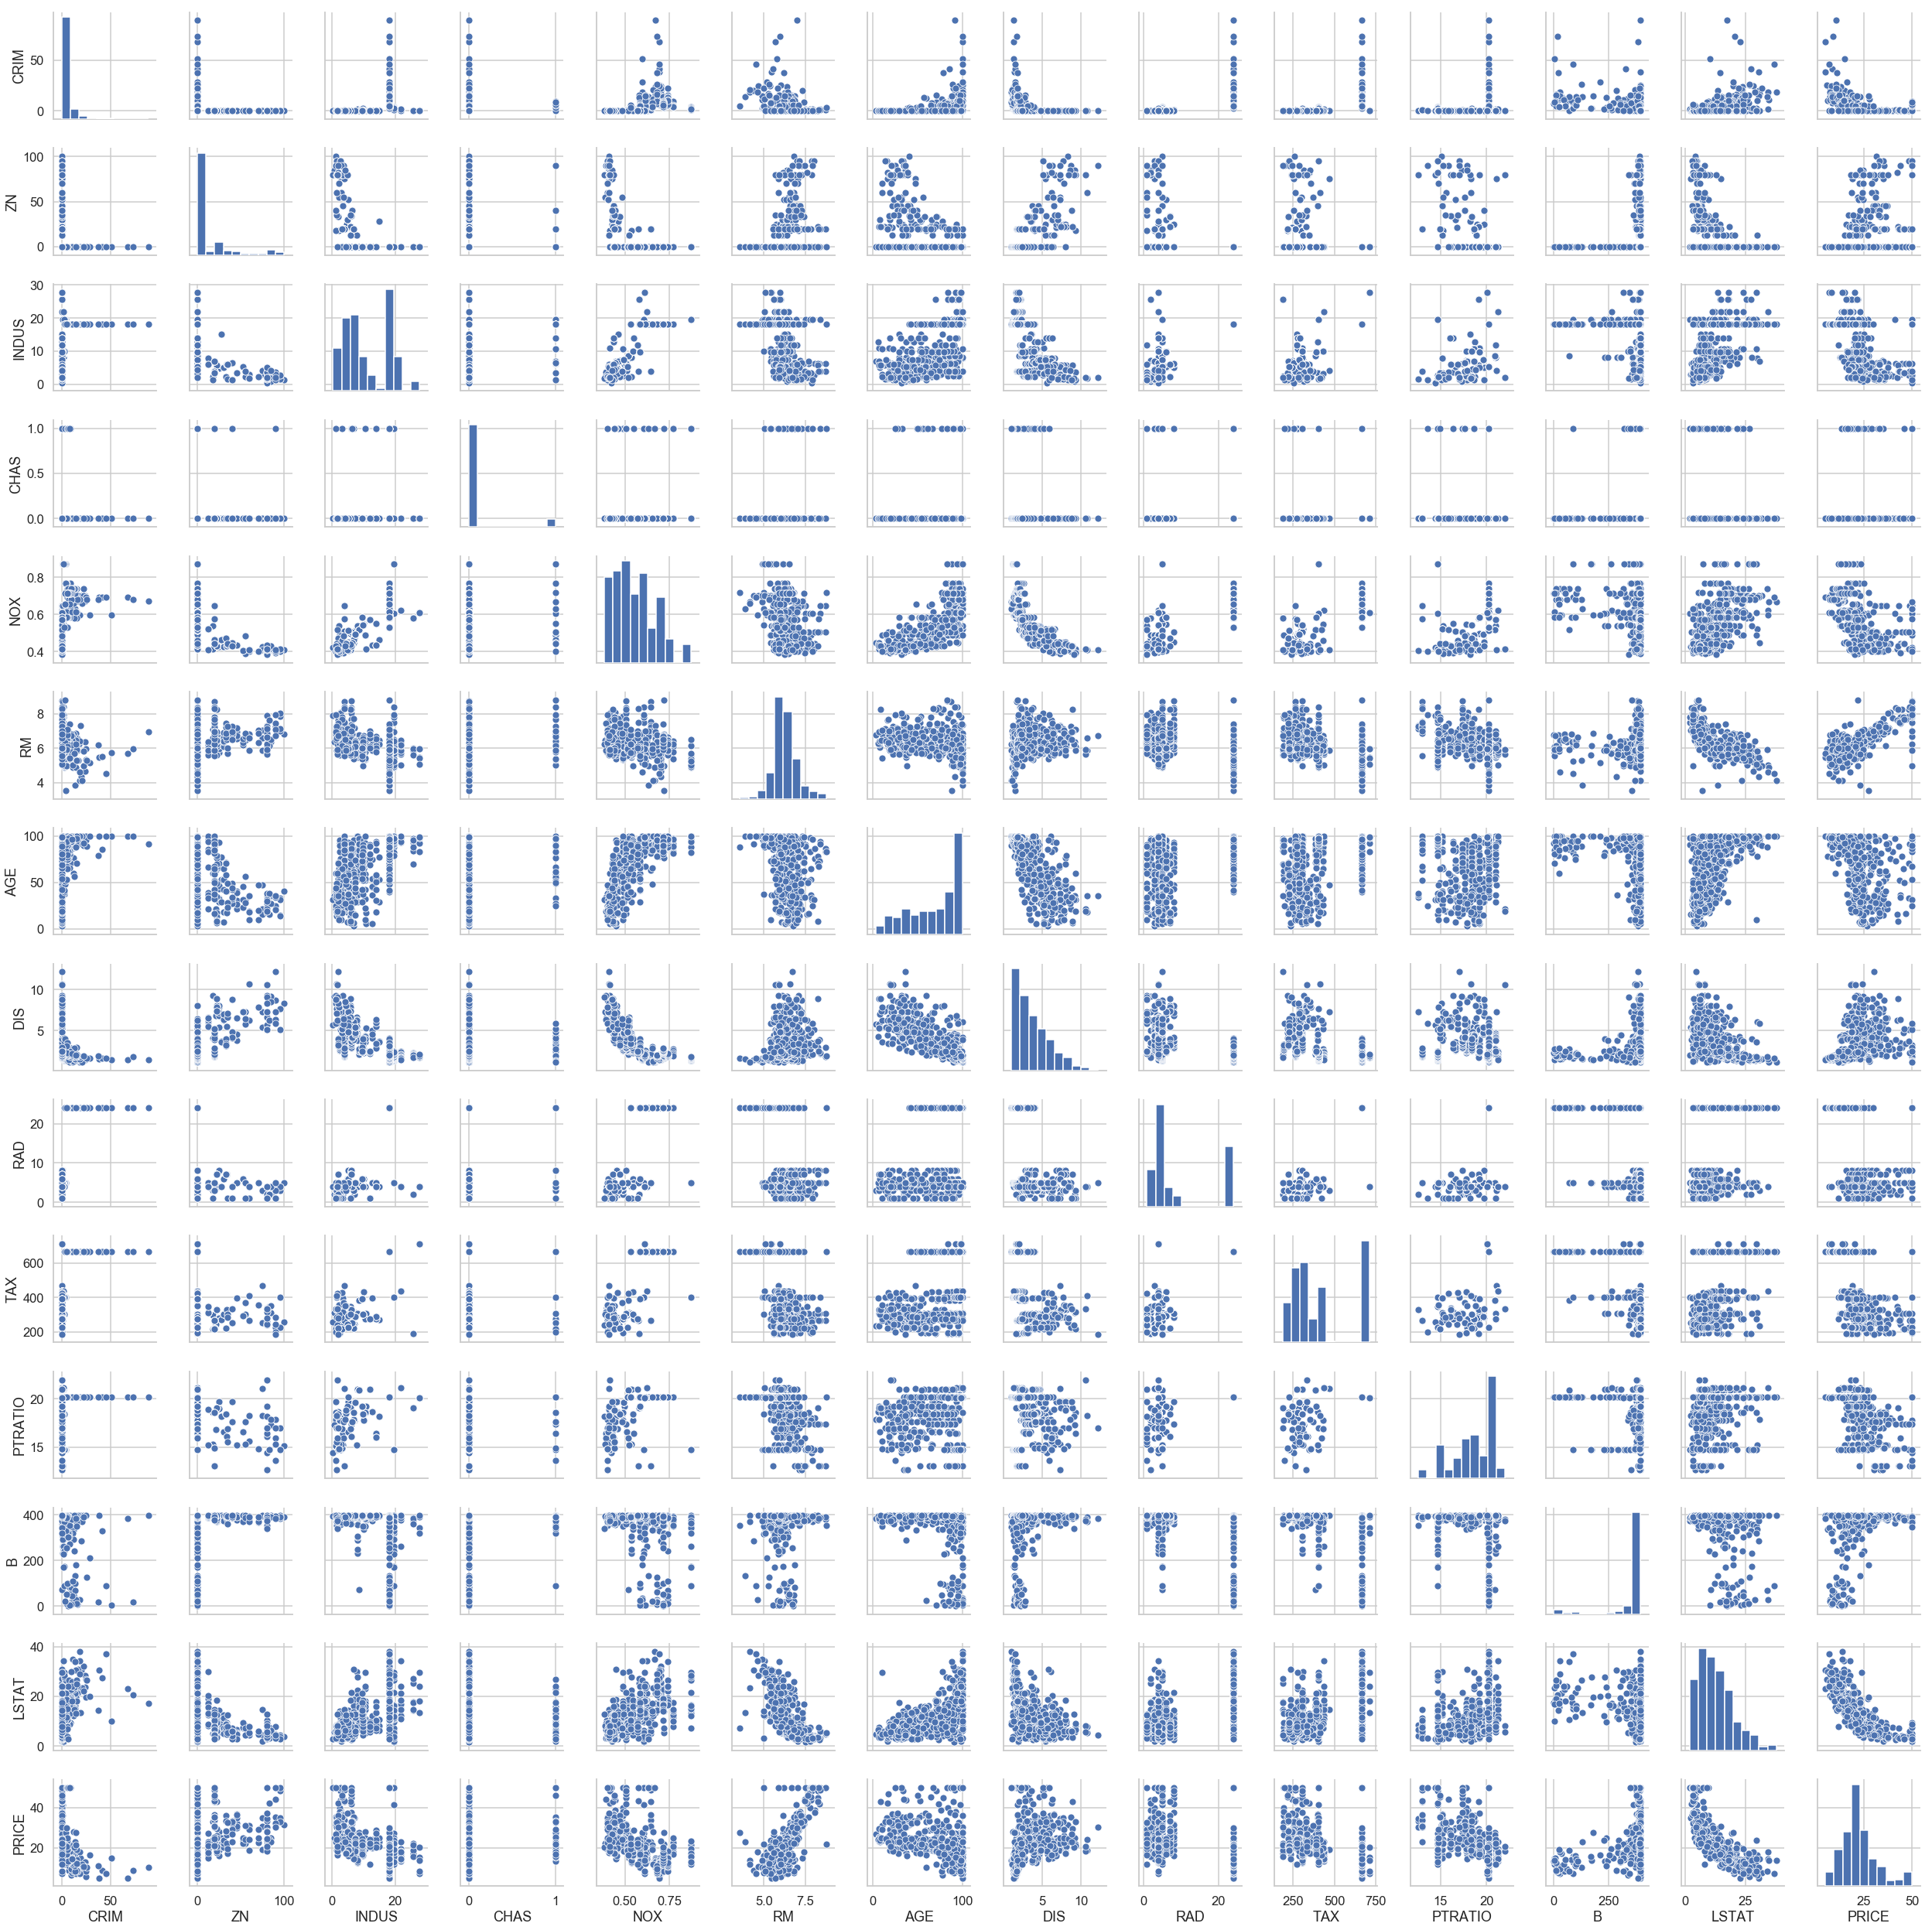

In [41]:
sns.pairplot(df)
plt.show()

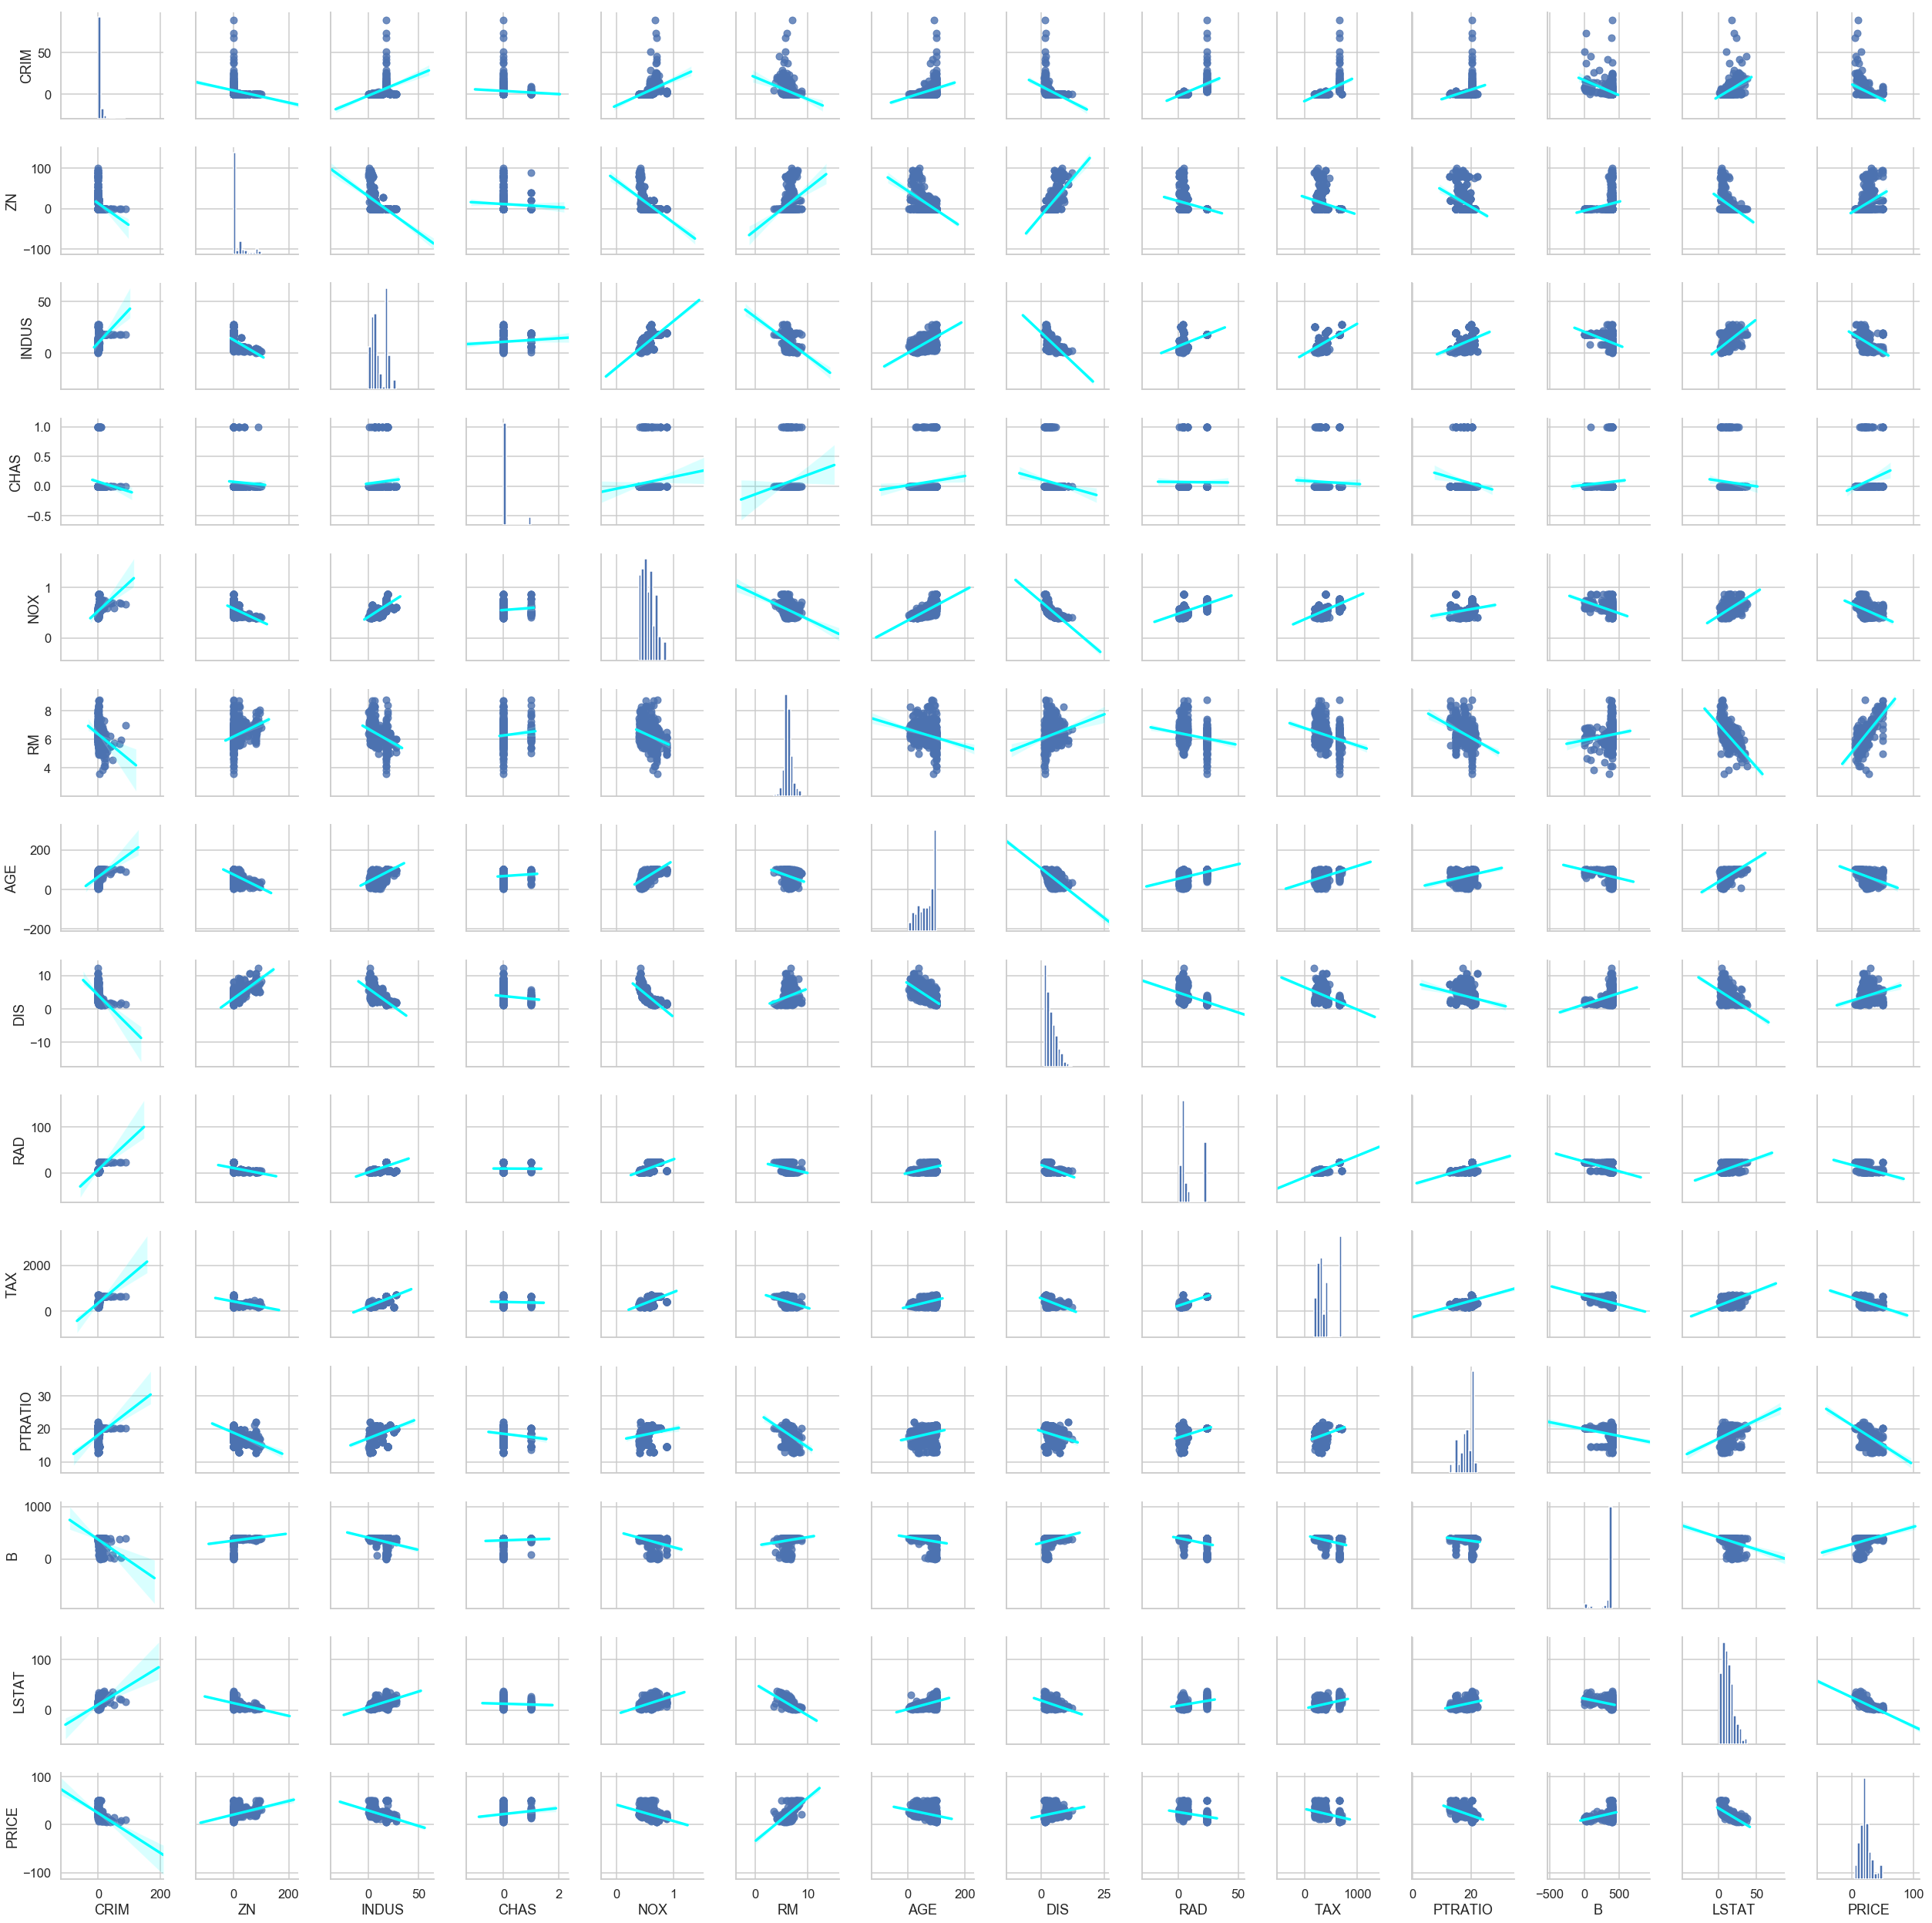

In [42]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

## Test Train Split and Linear Regression Modelling

In [43]:
Price = df['PRICE']
Features = df.drop(['PRICE'], axis=1)

In [44]:
Features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
X_train, X_test, y_train, y_test = train_test_split(Features, Price, test_size=0.2, random_state=10)
regr=LinearRegression()
Linear_Model = regr.fit(X_train, y_train)

In [46]:
print('The intercept is:', Linear_Model.intercept_)

The intercept is: 36.53305138282439


In [47]:
coeffs = pd.DataFrame(data=Linear_Model.coef_, index=Features.columns)
coeffs = coeffs.rename(columns={0:'coeff'})
coeffs

,coeff
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [48]:
y_pred = regr.predict(X_test)
print('The R Squared value:', round(r2_score(y_pred, y_test),3))
print('The MSE:', round(mean_squared_error(y_pred, y_test),3))
original_mse = round(mean_squared_error(y_pred, y_test), 3)
original_rsquared = round(r2_score(y_pred, y_test), 3)

The R Squared value: 0.49
The MSE: 34.414


The above numbers represent the R Squared and MSE of the predictions made on test dataset.

In [49]:
print('R Squared for train data:', regr.score(X_train, y_train))
print('R Squared for test data:', regr.score(X_test, y_test))

R Squared for train data: 0.750121534530608
R Squared for test data: 0.6709339839115628


### Data Transformation

In [50]:
# transforming the Price variable using log function to reduce the skewness
price_log = np.log(df['PRICE'])
price_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [51]:
print('Skew before transformation:', df['PRICE'].skew())
print('Skew after transformation:', price_log.skew())

Skew before transformation: 1.1080984082549072
Skew after transformation: -0.33032129530987864


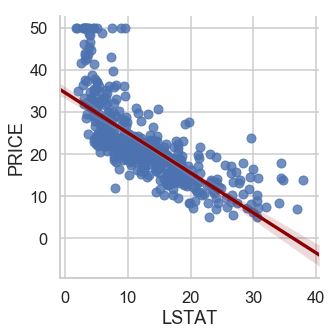

In [53]:
#Regression plot before transformation against LStat Variable
sns.lmplot(x='LSTAT', y='PRICE', data=df, line_kws={'color':'darkred'})
plt.show()

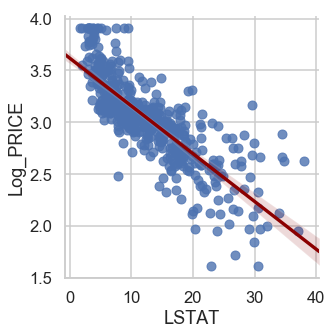

In [55]:
#Regression Plot after transformation
#print(type(price_log))
Transformed_data = Features
Transformed_data['Log_PRICE'] = price_log
sns.lmplot(x='LSTAT', y='Log_PRICE', data=Transformed_data, line_kws={'color':'darkred'})
plt.show()

##### Clearly the above line is a better fit.

In [57]:
Features = df.drop(['PRICE'], axis=1)

In [58]:
transfornmed_Price = Transformed_data['Log_PRICE']
X_train, X_test, y_train, y_test = train_test_split(Features, transfornmed_Price, test_size=0.2, random_state=10)
regr=LinearRegression()
Linear_Model = regr.fit(X_train, y_train)
y_pred = Linear_Model.predict(X_test)

In [59]:
print('The intercept is:', round(Linear_Model.intercept_, 3))
print('The R Squared value:', round(r2_score(y_pred, y_test),3))
print('The MSE:', round(mean_squared_error(y_pred, y_test),3))
transformed_mse = round(mean_squared_error(y_pred, y_test), 3)
transformed_rsquared = round(r2_score(y_pred, y_test), 3)

The intercept is: 4.06
The R Squared value: 0.697
The MSE: 0.043


In [61]:
pd.DataFrame({'mse': [original_mse, transformed_mse], 'r-squared': [original_rsquared, transformed_rsquared]}, 
             index= ['original model', 'reduced_log_model'])

,mse,r-squared
original model,34.414,0.490
reduced_log_model,0.043,0.697


#### The R Squared value of the predictions made on test dataset has increased from 0.49 to 0.697 after log transformation. Therefore, it has been a successful step.

In [62]:
coeffs_new = pd.DataFrame(data=Linear_Model.coef_, index=Features.columns)
coeffs_new = coeffs_new.rename(columns={0:'coeff'})
coeffs_new

,coeff
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [63]:
coeffs

,coeff
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


### p values & Evaluating Coefficients

In [65]:
X_incl_const = sm.add_constant(X_train) # add a column of constant(ones) to the dataframe
X_incl_const.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [66]:
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# results.pvalues
# results.params

In [67]:
#results.params
#results.pvalues

pd.DataFrame({'coeff': results.params, 'p-value': round(results.pvalues, 3)})

,coeff,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


##### p values for Features INDUS and AGE are greater than 0.05, therefore, not significant

In [68]:
vif = [] # empty list
for i in range (X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    
pd.DataFrame({'variable': X_incl_const.columns, 'vif': np.around(vif, 2)})

,variable,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


All the features have VIF less than a threshold of 10.

### Model Simplification and Baysian' Information Criterion

In [69]:
# original model with all features
X_incl_const = sm.add_constant(X_train) # add a column of constant(ones) to the dataframe
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
org_coeff = pd.DataFrame({'coeff': results.params, 'p-value': round(results.pvalues, 3)})
print('BIC equals:', results.bic)
print('r squared value:', results.rsquared)
print('mse:', round(results.mse_resid, 3))

BIC equals: -139.74997769478875
r squared value: 0.7930234826697582
mse: 0.035


The above values implies to the train dataset.

In [70]:
# model excluding INDUS
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
coeff_excl_INDUS = pd.DataFrame({'coeff': results.params, 'p-value': round(results.pvalues, 3)})
print('BIC equals:', results.bic)
print('r squared value:', results.rsquared)

BIC equals: -145.14508855591163
r squared value: 0.7927126289415163


In [71]:
# model excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
coeff_excl_INDUSnAGE = pd.DataFrame({'coeff': results.params, 'p-value': round(results.pvalues, 3)})
print('BIC equals:', results.bic)
print('r squared value:', results.rsquared)

BIC equals: -149.49934294224656
r squared value: 0.7918657661852815


###### the lower the value of BIC, the better the model

In [72]:
frames = pd.concat([org_coeff, coeff_excl_INDUS, coeff_excl_INDUSnAGE], axis=1, sort=False)
frames

,coeff,p-value,coeff,p-value,coeff,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


### Residual Analysis

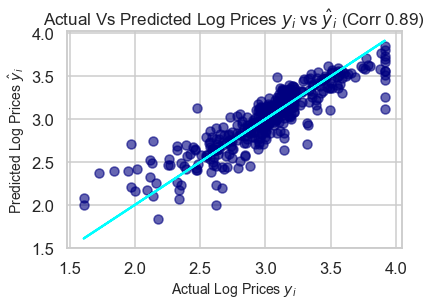

In [73]:
prices = np.log(df['PRICE'])
Features = df.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(Features, prices, test_size=0.2, random_state=10)

# using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_mse = round(results.mse_resid, 3)
reduced_rsquared = round(results.rsquared, 3)

# residuals = results.resid

# Graph Actual Vs Predicted Values

corr = round(y_train.corr(results.fittedvalues), 3)

plt.scatter(x=y_train, y=results.fittedvalues, color='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Log Prices $ y_i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y_i$', fontsize=14)
plt.title(f'Actual Vs Predicted Log Prices $ y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

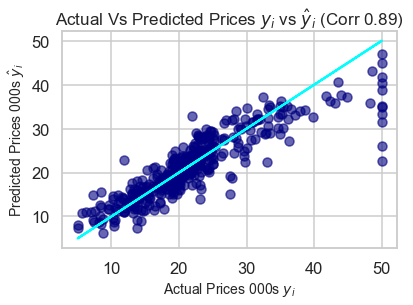

In [74]:
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='navy', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual Prices 000s $ y_i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y_i$', fontsize=14)
plt.title(f'Actual Vs Predicted Prices $ y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

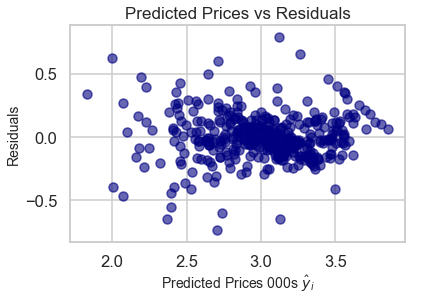

In [75]:
plt.scatter(x=results.fittedvalues, y=results.resid, color='navy', alpha=0.6)

plt.xlabel('Predicted Prices 000s $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Predicted Prices vs Residuals', fontsize=17)
plt.show()

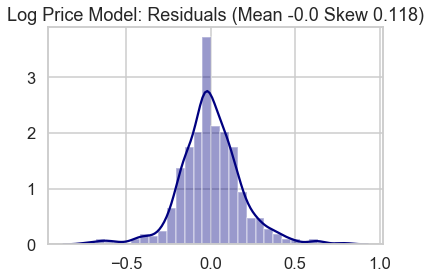

In [77]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log Price Model: Residuals (Mean {resid_mean} Skew {resid_skew})')
plt.show()

### The mean and skew of residuals has a value close to 0 which depicts a robust model.